## 5일차 랜덤포레스트
### sklearn의 GridSearchCV 함수를 사용해 최적의 매개변수들을 구하고, 최종 랜덤포레스트 모델을 만들고 해석하라.
### 데이터 : 유방암 데이터(변수: 31개, 자료 수: 569개)
### -목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개) 

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#os: 환경설정 패키지
import os
plt.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline
# sklearn.tree 의 DecisionTreeClassifier: 분류의사결정나무
from sklearn.ensemble import RandomForestClassifier
# sklearn.tree의 export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [2]:
bcancer = pd.read_csv("./과제파일/유방암.csv",engine = "python")
bcancer.isnull().sum() # 결측치 없음
bcancer.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# random seed 고정 -> 매번 실행 시 같은 값을 얻음
np.random.seed(seed = 1234)
# 0.7(70%) 보다 작으면 True -> train 데이터, 아니면 False -> test 데이터
msk = np.random.rand(bcancer.shape[0]) < 0.7
bcancer_train = bcancer[msk]
bcancer_test = bcancer[~msk]
# train/test 데이터의 목표변수 설명변수 지정
bcancer_train_y = bcancer_train["diagnosis"]
bcancer_train_x = bcancer_train.drop("diagnosis", axis = 1, inplace = False)
bcancer_test_y = bcancer_test["diagnosis"]
bcancer_test_x = bcancer_test.drop("diagnosis", axis = 1, inplace = False)
# train 데이터와 test 데이터 크기
print("train data X size : {}".format(bcancer_train_x.shape))
print("train data Y size : {}".format(bcancer_train_y.shape))
print("test data X size : {}".format(bcancer_test_x.shape))
print("test data Y size : {}".format(bcancer_test_y.shape))

train data X size : (385, 30)
train data Y size : (385,)
test data X size : (184, 30)
test data Y size : (184,)


In [4]:
x = bcancer.drop("diagnosis", axis = 1, inplace = False)
y = bcancer["diagnosis"]
bcancer_train_x, bcancer_test_x, bcancer_train_y, bcancer_test_y = train_test_split(x, y, test_size=0.3, random_state=1234)
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
parameters = {'criterion':('gini', 'entropy'),
              'n_estimators':[10,50,100,200],
              'min_samples_leaf':[1,5,10,20,50], 
              'max_depth':[i for i in range(1,11)],
              'max_features':['auto','sqrt','log2'],
             }
rf = RandomForestClassifier(random_state=1234)
gsearch = GridSearchCV(rf, param_grid = parameters, cv=5, n_jobs = -1) # 보통 cv = 5로 두고 cross validation 진행.
gsearch.fit(bcancer_train_x, bcancer_train_y)
print("Best Score: {}".format(gsearch.best_score_))
print("Best params: {}".format(gsearch.best_params_))
print("Best estimators: {}".format(gsearch.best_estimator_))
print("train data X size: {}".format(bcancer_train_x.shape))
print("train data Y size: {}".format(bcancer_train_y.shape))
print("test data X size: {}".format(bcancer_test_x.shape))
print("test data Y size: {}".format(bcancer_test_y.shape))

Best Score: 0.9748743718592965
Best params: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50}
Best estimators: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
train data X size: (398, 30)
train data Y size: (398,)
test data X size: (171, 30)
test data Y size: (171,)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [5]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(bcancer_train_x, bcancer_train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(rf_uncustomized.score(bcancer_train_x, bcancer_train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(rf_uncustomized.score(bcancer_test_x, bcancer_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.942


In [6]:
d = gsearch.best_params_

In [7]:
rf_model = RandomForestClassifier(criterion= d["criterion"],max_depth=d["max_depth"], min_samples_leaf=d['min_samples_leaf'], n_estimators=d['n_estimators'], max_features=d['max_features'], random_state=1234)
rf_model.fit(bcancer_train_x,bcancer_train_y)
#rf_model.feature_importances_로 설명변수 중요도 확인
ds_feature_importance = pd.DataFrame()
ds_feature_importance["featrue"] = bcancer_train_x.columns
ds_feature_importance["importance"] = rf_model.feature_importances_
ds_feature_importance.sort_values(by="importance", ascending=False)

,featrue,importance
22,worst perimeter,0.125328
20,worst radius,0.123160
27,worst concave points,0.111833
7,mean concave points,0.097344
6,mean concavity,0.091930
23,worst area,0.067412
2,mean perimeter,0.059548
13,area error,0.033080
3,mean area,0.032794
0,mean radius,0.030711


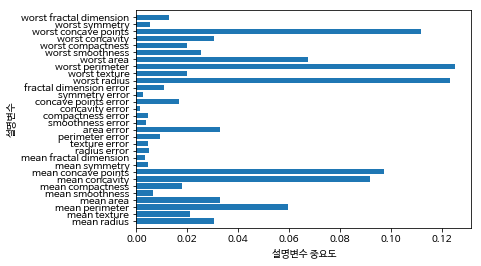

In [11]:
# 설명변수 중요도 그래프 함수 정의
def plot_feature_importances(model):
    n_features = bcancer_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),  bcancer_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)

# 설명변수 중요도 그래프 함수 실행
plot_feature_importances(rf_model)